**PROYECTO STATISTICAL LEARNING**

Oscar Melchor I594201

Walter Najera 9630850

Creamos el entorno

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler



Cargamos el archivos de datos

In [109]:
#cargamos el archivo de datos
data = np.load('./proyecto_training_data.npy')

Creamos el dataset

In [110]:
dataset = pd.DataFrame(data, columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
dataset.head()
#dataset.to_excel("Dataset.xlsx")

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


Separación del Dataset en subset de variables independientes y la dependiente

In [111]:
#separamos el dataset en dos, 1 el set de entrenamiento y 2 el set de test

X = dataset[['OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']]
Y = dataset[['SalePrice']]

In [112]:
#Ingenieria de caracteristicas - codificacion del target
#lableEconder = LabelEncoder()
#lableEconder.fit(['No','Yes'])
#Y =lableEconder.transform(y.values)

In [113]:
#X_train, X_test, Y_train,  Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state= 2022)

Análisis Exploratorio de Datos

Estadistica descriptiva de la variable OverallQual

In [114]:
#Variable OverallQual
OverallQual_Summary = X['OverallQual'].describe()
OverallQual_Summary


count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

Evaluación de Nulos para la variable OverallQual

In [115]:
nulosOverallQual = (X['OverallQual'].isna().sum() / len(X['OverallQual']))
nulosOverallQual

0.0

Estadistica descriptiva de la variable 1stFlrSF

In [116]:
#Variable 1stFlrSF
FirstFlrSF_Summary = X['1stFlrSF'].describe()
FirstFlrSF_Summary

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

Evaluación de Nulos para la variable 1stFlrSF

In [117]:
nulos1stFlrSF = (X['1stFlrSF'].isna().sum() / len(X['1stFlrSF']))
X['1stFlrSF'].isna().sum()

0

Estadistica descriptiva de la variable TotRmsAbvGrd

In [118]:
#Variable TotRmsAbvGrd
TotRmsAbvGrd_Summary = X['TotRmsAbvGrd'].describe()
TotRmsAbvGrd_Summary

count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64

Evaluación de Nulos para la variable TotRmsAbvGrd

In [119]:
nulosTotRmsAbvGrd = (X['TotRmsAbvGrd'].isna().sum() / len(X['TotRmsAbvGrd']))
nulosTotRmsAbvGrd

0.0

Estadistica descriptiva de la variable YearBuilt

In [120]:
#Variable YearBuilt
YearBuilt_Summary = X['YearBuilt'].describe()
YearBuilt_Summary

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

Evaluación de Nulos para la variable YearBuilt

In [121]:
nulosYearBuilt = (X['YearBuilt'].isna().sum() / len(X['YearBuilt']))
nulosYearBuilt

0.0

Estadistica descriptiva de la variable LotFrontage

In [122]:
#Variable LotFrontage
LotFrontage_Summary = X['LotFrontage'].describe()
LotFrontage_Summary

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

Evaluación de Nulos para la variable LotFrontage

In [123]:
nulosLotFrontage = (X['LotFrontage'].isna().sum() / len(X['LotFrontage']))
nulosLotFrontage

0.1773972602739726

Corregimos con el promedio los nulos en la columna LotFrontpage

In [124]:
meanValue = np.round(X['LotFrontage'].mean(), 0)
X['LotFrontage'] = X['LotFrontage'].fillna(meanValue)

C:\Users\OSCARM~1\AppData\Local\Temp/ipykernel_8224/2666226222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['LotFrontage'] = X['LotFrontage'].fillna(meanValue)


Estadistica descriptiva de la variable SalePrice

In [125]:
#Variable LotFrontage
SalePrice_Summary = Y['SalePrice'].describe()
SalePrice_Summary

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Evaluación de Nulos para la variable SalePrice

In [126]:
nulosSalePrice = (Y['SalePrice'].isna().sum() / len(Y['SalePrice']))
nulosSalePrice

0.0

Generamos los Histogramas para las variables

c:\Users\Oscar Melchor\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


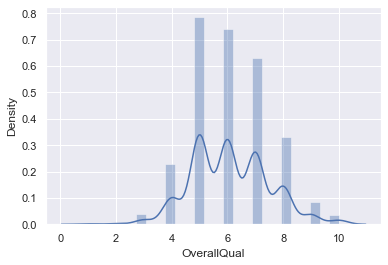

In [127]:
sb.set_theme()
ax = sb.distplot(X['OverallQual'])

c:\Users\Oscar Melchor\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


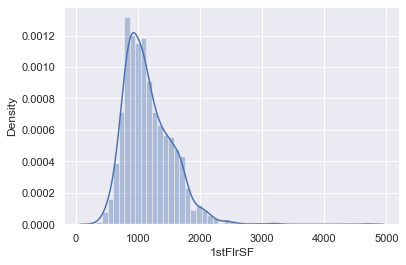

In [128]:
sb.set_theme()
ax = sb.distplot(X['1stFlrSF'])

c:\Users\Oscar Melchor\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


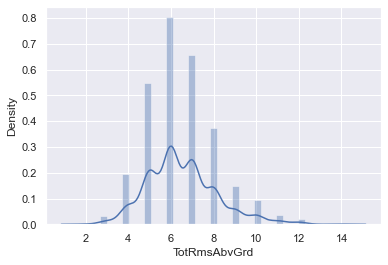

In [129]:
sb.set_theme()
ax = sb.distplot(X['TotRmsAbvGrd'])

c:\Users\Oscar Melchor\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


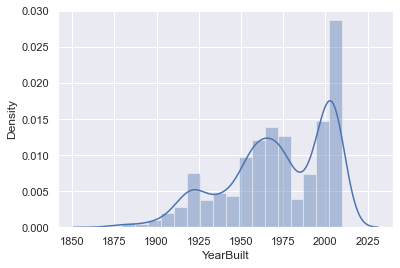

In [130]:
sb.set_theme()
ax = sb.distplot(X['YearBuilt'])

c:\Users\Oscar Melchor\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


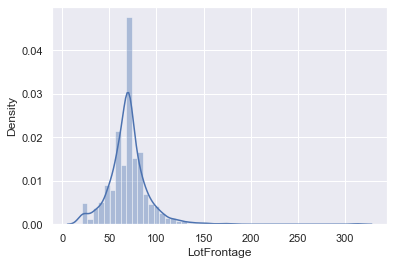

In [131]:
sb.set_theme()
ax = sb.distplot(X['LotFrontage'])

c:\Users\Oscar Melchor\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


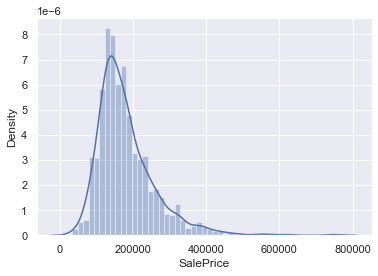

In [132]:
sb.set_theme()
ax = sb.distplot(Y['SalePrice'])

Definimos la Función para calcular el coeficiente de correlación

In [133]:
def calcCorrCoef(df, target):
    for col in df.columns:
        print('Correlación - ' + col + ":",
            df[target].corr(df[col], method = 'pearson'))

Calculamos el coeficiente de correlación para cada variable vs SalePrice

In [134]:
calcCorrCoef(dataset, 'SalePrice')

Correlación - SalePrice: 1.0
Correlación - OverallQual: 0.790981600583805
Correlación - 1stFlrSF: 0.6058521846919146
Correlación - TotRmsAbvGrd: 0.5337231555820283
Correlación - YearBuilt: 0.522897332879497
Correlación - LotFrontage: 0.3517990965706778


Graficamos ScatterPlot para las variables Independientes vs SalePrice(Y)

OverallQual correlacionado con SalePrice

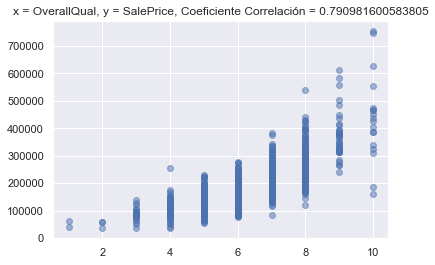

In [135]:
x = dataset['OverallQual']
y = dataset['SalePrice']
cor=np.corrcoef(dataset['OverallQual'],dataset['SalePrice'])
titulo = 'x = OverallQual, y = SalePrice, Coeficiente Correlación = ' + str(cor[0,1])
colors = np.random.rand(20)
plt.scatter(x,y, alpha=0.5)
plt.title(titulo)
plt.show()

1stFlrSF correlacionado con SalePrice

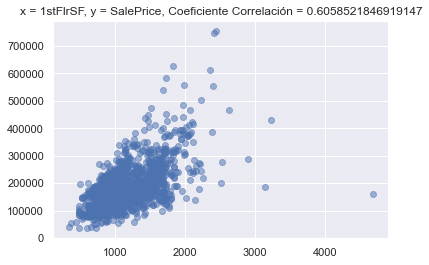

In [136]:
x = dataset['1stFlrSF']
y = dataset['SalePrice']
cor=np.corrcoef(dataset['1stFlrSF'],dataset['SalePrice'])
titulo = 'x = 1stFlrSF, y = SalePrice, Coeficiente Correlación = ' + str(cor[0,1])
colors = np.random.rand(20)
plt.scatter(x,y, alpha=0.5)
plt.title(titulo)
plt.show()

TotRmsAbvGrd correlacionado con SalePrice

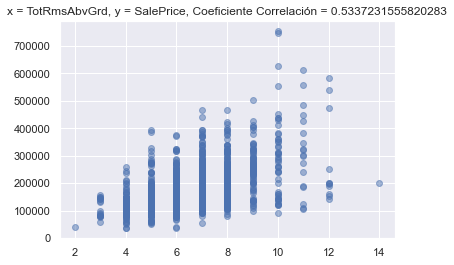

In [137]:
x = dataset['TotRmsAbvGrd']
y = dataset['SalePrice']
cor=np.corrcoef(dataset['TotRmsAbvGrd'],dataset['SalePrice'])
titulo = 'x = TotRmsAbvGrd, y = SalePrice, Coeficiente Correlación = ' + str(cor[0,1])
colors = np.random.rand(20)
plt.scatter(x,y, alpha=0.5)
plt.title(titulo)
plt.show()

YearBuilt correlacionado con SalePrice

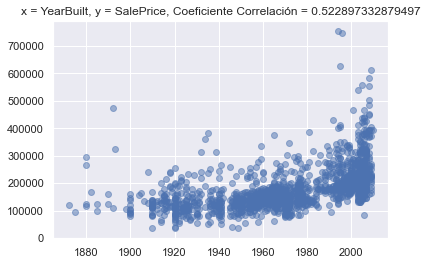

In [138]:
x = dataset['YearBuilt']
y = dataset['SalePrice']
cor=np.corrcoef(dataset['YearBuilt'],dataset['SalePrice'])
titulo = 'x = YearBuilt, y = SalePrice, Coeficiente Correlación = ' + str(cor[0,1])
colors = np.random.rand(20)
plt.scatter(x,y, alpha=0.5)
plt.title(titulo)
plt.show()

LotFrontage correlacionado con SalePrice

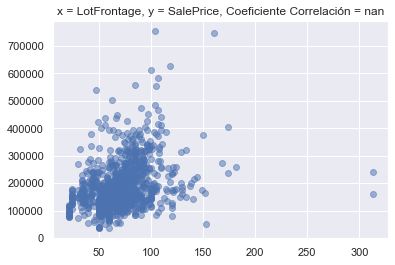

In [139]:
x = dataset['LotFrontage']
y = dataset['SalePrice']
cor=np.corrcoef(dataset['LotFrontage'],dataset['SalePrice'])
titulo = 'x = LotFrontage, y = SalePrice, Coeficiente Correlación = ' + str(cor[0,1])
colors = np.random.rand(20)
plt.scatter(x,y, alpha=0.5)
plt.title(titulo)
plt.show()

**Las dos variables elegidas por mejor correlación son: OverallQual y 1stFlrSF**

Parámetros de la función

In [140]:
X_train, X_test, Y_train,  Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state= 2022)

In [141]:
X = X_train['OverallQual']
y = Y_train['SalePrice']
epoch = 20000
imprimir_error_cada = 20
Learnig_rate = 0.0000001


Separamos el set de datos de entrenamiento y prueba

Cuerpo de la función

In [142]:
unos = np.ones(np.shape(X)).reshape(-1, 1)
X = X.to_numpy().reshape(-1,1)
matriz = np.hstack([X, unos])
ds_tobe_returned = pd.DataFrame(columns=['epoch', 'B0', 'B1','elerror'])

b0 = 0
b1 = 0
for i in range(epoch):
    betas = np.array([b1,b0]).reshape(-1,1)
    y_estimado = np.matmul(matriz, betas)
    gradienteB0 = np.mean(y_estimado - y.to_numpy())
    gradienteB1 = np.mean(y_estimado - y.to_numpy()*X)
    b0 = b0 - Learnig_rate*gradienteB0
    b1 = b1 - Learnig_rate*gradienteB1

    if((i % imprimir_error_cada) == 0):
        calc_error = (np.mean((y.to_numpy() - y_estimado )**2)*(1/(2*epoch)))
        datos = {'epoch' : i,'B0' : b0,'B1' : b1 ,'elerror' : calc_error}
        ds_tobe_returned = ds_tobe_returned.append(datos, ignore_index=True)
    #return b0, b1, errores
print("Beta0: ", b0)
print("Beta1: ", b1)
ds_tobe_returned.head()
ds_tobe_returned.to_excel("ds_tobe_returned.xlsx")

Beta0:  348.30943154460556
Beta1:  2187.3904311048054


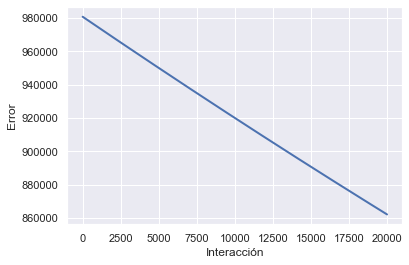

In [143]:
XX = ds_tobe_returned['epoch']
YY = ds_tobe_returned['elerror']

#plt.style.use('_mpl-gallery')

# plot
fig, ax = plt.subplots()

ax.plot(XX, YY, linewidth=2.0)
#ax.scatter(XX, YY, vmin=0, vmax=100)

#ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#       ylim=(0, 8), yticks=np.arange(1, 8))
plt.xlabel("Interacción")
plt.ylabel("Error")

plt.show()

Preparamos el modelo de SKLEARN

In [144]:
from sklearn.svm import SVC

In [145]:
svm = SVC(kernel= "linear", C=1.0)
svm

SVC(kernel='linear')

In [146]:
svm.fit(X_train, Y_train) #entrenamos el modelo

c:\Users\Oscar Melchor\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [147]:
svm

SVC(kernel='linear')

In [148]:
X_train.to_excel("X_train.xlsx")
Y_train.to_excel("Y_train.xlsx")